# Hugging Face

Una de las plataformas estrella para el almacenamiento de recursos de modelado (datos, modelos, demos,...). Nos centraremos en una sección concreta pero mucho de lo que veremos puede extenderse a otras tipologías (transformers, sistemas multimodelo, etc..)

Deberemos registrarnos en HuggingFace.co y obtener un token que nos permita autenticarnos.

![HF](../assets/images/hf-token.png)

https://huggingface.co/docs/diffusers/en/index

Necesitaremos librerías específicas para conectarnos a HuggingFace de forma programática. Aunque si estáis usando UV ya deberíais tenerlas.

In [ ]:
# !pip install --upgrade python-dotenv huggingface_hub diffusers accelerate transformers

Dotenv nos permite crear un fichero _.env_ a excluir de nuestro control de versiones donde poder almacenar cosas como nuestro token de HuggingFace.

```sh
TOKEN_HF=...
```

In [2]:
from dotenv import load_dotenv

load_dotenv(override=True)

True

In [3]:
import os

hf_token = os.environ.get("TOKEN_HF")

In [5]:
from huggingface_hub import login

login(token = hf_token)

/home/iraitz/TheBridge/DSPT2025-ML/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-14 09:33:10.286079: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-14 09:33:10.295872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752478390.306741   93812 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752478390.310456   93812 cuda_bla

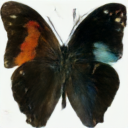

In [1]:
from diffusers import DiffusionPipeline

generator = DiffusionPipeline.from_pretrained("anton-l/ddpm-butterflies-128") #.to("cuda")
generator().images[0]

In [2]:
generator

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "anton-l/ddpm-butterflies-128",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

In [3]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True) #.to("cuda")
pipeline

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 29.08it/s]


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
pipeline.scheduler

PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.34.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}

Los _schedulers_ o planificadores que veis en el pipeline hace referencia al proceso de definición (_denoising_), ya que debemos iterar sobre el mismo modelo de formas concretas para generar la imagen deseada. Podéis recurrir a la [documentación](https://huggingface.co/docs/diffusers/api/schedulers/overview) para entender mejor vuestro caso concreto: https://huggingface.co/docs/diffusers/v0.34.0/en/api/schedulers/pndm

Algunos de estos modelos pueden tomar texto de entrada y representar la imagen que el texto indica.

100%|██████████| 50/50 [03:47<00:00,  4.56s/it]


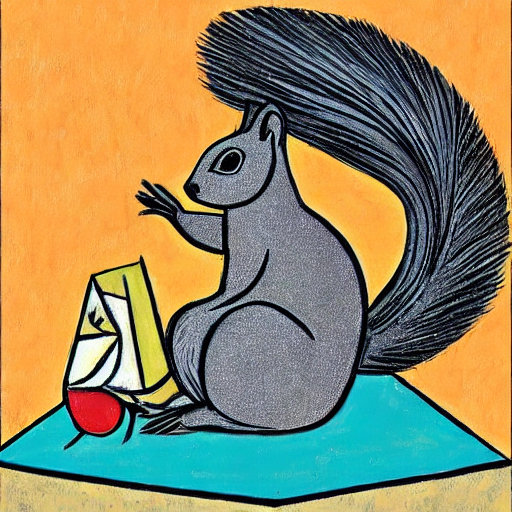

In [5]:
pipeline("An image of a squirrel in Picasso style").images[0]

Para entender el proceso completo debemos asimilar que:

* El texto se convierte en **tokens** que son representados numéricamente en un **embedding** denso
* Disponemos de un modelo de difusión que proyecta **ruido** de las imágenes
* Partiendo de una imagen **ruidosa** podemos **condicionar** con nuestro embedding la predicción de ruido
* Si iteramos suficientes veces la imagen generada representará lo indicado por el embedding

![arquitectura](https://imgs.search.brave.com/-xw6aiQ7jGJKbw1fdazPe1qaV8zLHM1gEaotThTral0/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9zdGFi/bGUtZGlmZnVzaW9u/LWFydC5jb20vd3At/Y29udGVudC91cGxv/YWRzLzIwMjIvMTIv/aW1hZ2UtODYtMTAy/NHg0MjUucG5n)

Aquí tenéis una guía detallada de cómo se hacen estas transformaciones de principio a fin (en inglés): https://stable-diffusion-art.com/how-stable-diffusion-work/

# Github Models

Github Models es un marketplace the modelos directamente disponible en Github.

![](../assets/images/githubmodels.png)

Una vez seleccionado un modelo nos guía en su uso:

* Creación de un token de acceso a Github
* Instalar las librerías necesarias: azure-ai-inference
* Y lanzar nuestro código

![](../assets/images/githubmodelsmeta.png)

Podéis usar

```
!pip install azure-ai-inference
```

In [ ]:
from dotenv import load_dotenv

load_dotenv(override=True)

In [ ]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import SystemMessage, UserMessage
from azure.core.credentials import AzureKeyCredential

endpoint = "https://models.github.ai/inference"
model = "meta/Llama-4-Scout-17B-16E-Instruct"
token = os.environ["GITHUB_TOKEN"]

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)

response = client.complete(
    messages=[
        SystemMessage("Eres un asistente con un ligero defecto en el habla: usas demasiadas S."),
        UserMessage("Cuéntame algo sobre las serpientes"),
    ],
    temperature=1.0,
    top_p=1.0,
    max_tokens=1000,
    model=model
)

print(response.choices[0].message.content)